Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
x_data의 shape : (20, 150, 150, 3)
t_data의 shape : (20,)


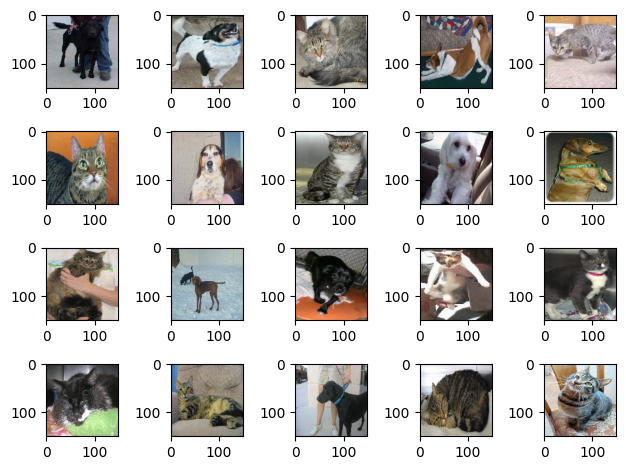

In [1]:
# 데이터를 가져오기 위해서
# (우리에게 제공된 이미지 파일로부터 pixel데이터를 추출하기위해)
# Keras가 제공하는 ImageDataGenerator를 사용할꺼예요!

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# 학습하기위해서는 train data와 validation data가 필요해요!
# 지금까지는 학습할때 train data 중 일부(30%)를 띄어서 validation에 사용했어요
# validation_split=0.3 <- 이런식의 option을 이용해서 처리했었어요!
# 이렇게 해도 되지만 아예 validation data를 별도로 사용할 수 있어요!

train_dir = 'C:/Users/user/Desktop/my_ws/edu/deeplearning/23_12_18/cat_dog_small/train'
validation_dir = 'C:/Users/user/Desktop/my_ws/edu/deeplearning/23_12_18/cat_dog_small/validation'

# ImageDataGenerator 객체를 생성해요!
# pixel값(RGB)은 각각 0~255사이의 값을 가져요!
# 정규화처리를 한 pixel 데이터를 가져오기 위해서 rescale을 사용해요!

train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,   # 어떤폴더에서 이미지를 가져올지 설정
    classes=[ 'cats', 'dogs'], # 폴더명을 명시해요!
                               # cats 폴더에서 가져온 픽셀데이터의 label을 0으로
                               # dogs 폴더에서 가져온 픽셀데이터의 label을 1로
    target_size=(150,150),     # 이미지 size를 똑같이 resize
    batch_size=20,             # 한번에 20개의 이미지를 가져와서 pixel데이터로
                               # 변환해요. 조심할거는..label에 상관없이 가져와요!
                               # 멍멍이 10개, 고양이 10개 이렇게 가져오는게
                               # 아니라.. 둘 합쳐서 20개 가져와요!
    class_mode = 'binary'      # 이진분류인 경우 bianry
                               # 다중분류인 경우 categorical
)

validation_generator = validation_data_gen.flow_from_directory(
    validation_dir,   # 어떤폴더에서 이미지를 가져올지 설정
    classes=[ 'cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode = 'binary'
)

# generator를 만들었으니 실제로 한번 동작시켜서 데이터를 잘 추출하는지
# 확인해 보아요!

# x_data는 당연히 이미지의 pixel data
# t_data는 이미지의 label(0(고양이) 혹은 1(멍멍이))
for x_data, t_data in train_generator:
    print(f'x_data의 shape : {x_data.shape}')   # (20,150,150,3)
    print(f't_data의 shape : {t_data.shape}')   # (20,)
    break

# 가져온 pixel data가 진짜 이미지의 pixel data인지 확인해보아요!
# pixel데이터를 이용해서 그림을 그려보면 되겠죠!
fig = plt.figure()
axs = []   # subplot들이 저장되는 list

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for x_data, t_data in train_generator:
                                # (20, 150, 150, 3)
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)

    break

plt.tight_layout()
plt.show()

In [2]:
# 이렇게 ImageDataGenerator의 사용법을 익히고!
# 이걸 이용해서 Keras Model 만들고 이미지 학습을 진행하면 될 거 같아요!
# 학습에 사용하는 데이터는
# train용으로 멍멍이 1000장, 고양이 1000장 사용할꺼구요!
# validation용으로 멍멍이 500장, 고양이 500장 사용할꺼구요!
# test용으로 멍멍이 500장, 고양이 500장 사용할꺼예요!
# 전체 이미지는 25,000장 중에 4000장의 이미지를 사용할꺼예요..
# 일부분의 이미지를 이용해서 학습 및 평가를 진행할꺼예요! 다연히 성능이 좋지
# 않겠죠!

In [3]:
# 위쪽에서 generator를 만들었으니
# 이제 모델을 만들고 학습을 진행해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# CNN을 구현할꺼니까..처음에는 Feature Extraction부분이 나와요!

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))
                 # filter의 shape => (3,3,3,32)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer (DNN 학습)
model.add(Flatten())   # 4차원 데이터를 2차원으로 변형

model.add(Dense(units=512,
                activation='relu'))

model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

In [4]:
# 모델이 완성되었으면 이제 학습을 진행해요!
from tensorflow.keras.callbacks import EarlyStopping

es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

# 학습데이터와 validation 데이터가 generator로 되어 있어요!
# train_generator는 1번 실행하면 20개의 이미지 pixel을 가져와요!
# 그런데 1 epoch을 돌려면 이미지 몇개가져와야 하나요? 2000개!
# 따라서 train_generator를 100번 실행해야 20 * 100 = 2000개의 이미지를
# 가져와서 학습에 사용할 수 있어요!
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50,
                    callbacks=[es_cb],
                    verbose=1)



Epoch 1/50
100/100 [==============================] - 12s 60ms/step - loss: 0.6922 - acc: 0.5310 - val_loss: 0.6807 - val_acc: 0.5780
Epoch 2/50
100/100 [==============================] - 5s 47ms/step - loss: 0.6225 - acc: 0.6570 - val_loss: 0.6454 - val_acc: 0.6240
Epoch 3/50
100/100 [==============================] - 5s 51ms/step - loss: 0.5416 - acc: 0.7220 - val_loss: 0.6275 - val_acc: 0.6580
Epoch 4/50
100/100 [==============================] - 5s 54ms/step - loss: 0.4986 - acc: 0.7585 - val_loss: 0.6223 - val_acc: 0.6480
Epoch 5/50
100/100 [==============================] - 5s 49ms/step - loss: 0.4503 - acc: 0.7945 - val_loss: 0.5608 - val_acc: 0.7170
Epoch 6/50
100/100 [==============================] - 4s 41ms/step - loss: 0.4061 - acc: 0.8150 - val_loss: 0.5745 - val_acc: 0.7200
Epoch 7/50
100/100 [==============================] - 4s 41ms/step - loss: 0.3572 - acc: 0.8350 - val_loss: 0.6521 - val_acc: 0.7050
Epoch 8/50
100/100 [==============================] - 4s 45ms/step -

In [5]:
# overfitting이 많이 발생하게 되요
# 가장 큰 이유는 일단 이미지수가 너무 적어요!
# 총 25,000개 중에 4000개만 학습이 이용..
# 정확하게는 2000개의 이미지만 학습에 이용하고 2000개는 validation과 test에 이용
# 이미지 증식(Image Augmentation)을 통해서 학습이미지수를 늘려서 학습을 진행!

<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


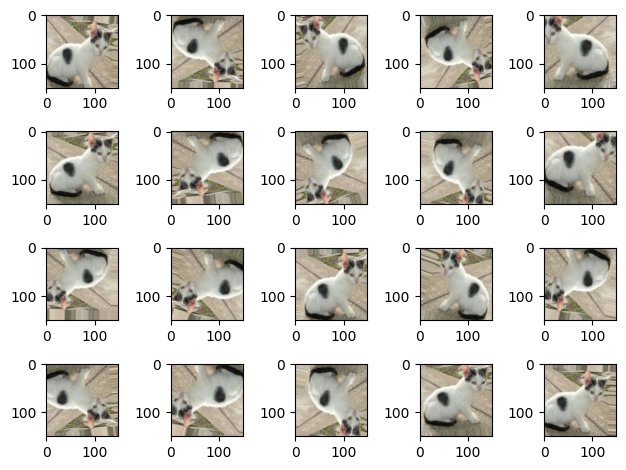

In [6]:
# Image Augmnetation이 포함된 코드

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')
img = image.load_img('C:/Users/user/Desktop/my_ws/edu/deeplearning/23_12_18/cat_dog_small/train/cats/cat.3.jpg',
                       target_size=(150,150))

x = image.img_to_array(img)
print(type(x))  # <class 'numpy.ndarray'>
print(x.shape)  # (150, 150, 3)

# ImageDataGenerator를 이용해서 이 파일로부터 증식된 이미지를 추출할꺼예요!
# 기본적으로 ImageDataGenerator는 4차원데이터를 이용해요!
# 우리 이미지도 역시 4차원으로 표현해야 해요!
x = x.reshape((1,) + x.shape)
print(x.shape)  # (1, 150, 150, 3)

fig = plt.figure()
axs = []

# 그림을 그릴 수 있는 subplot 20개를 준비해요!
for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x,
                          batch_size=1):
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break

plt.tight_layout()
plt.show()

In [1]:
# 아하..그러면
# 우리가 가진 얼마안되는 데이터(학습데이터가 개와 고양이 2000장)를
# 증식기법을 이용해서 변경된 이미지를 이용해서 학습데이터 수를 늘리고
# dropout이라는 기법도 활용해서 Overfitting을 줄여보아요!
# 코드를 작성해서 눈으로 확인해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


# GPU 메모리 동적 설정
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

train_dir = 'C:/Users/user/Desktop/my_ws/edu/deeplearning/23_12_18/cat_dog_small/train'
validation_dir = 'C:/Users/user/Desktop/my_ws/edu/deeplearning/23_12_18/cat_dog_small/validation'

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# validation data는 증식을 사용하면 안되요! (평가용 데이터이기 때문)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

# model 생성

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# 여기까지가 Feature Extraction 부분이예요! 이미지의 특징을 추출하는 부분
# 이렇게 이미지의 특징을 추출한 후 2차원으로 변경해서 학습을 진행!

model.add(Flatten())  # 4차원데이터를 2차원으로 변경(이미지 3차원을 1차원으로 변경)

model.add(Dropout(rate=0.5))

# hidden layer
model.add(Dense(units=512,
                activation='relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# overfitting 정도를 확인하기 위해 EarlyStopping은 설정하지 않았어요!
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1
                    )

# 오래걸려서 런타임이 만료될 수 있어요. 그래서 학습이 끝나면 파일에 저장할꺼예요!
# 즉, 학습이 끝난 우리의 모델과 계산된 가중치를 파일에 저장!!
model.save('cat_dog_small_cnn_model.h5')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 13s 89ms/step - loss: 0.6960 - acc: 0.4995 - val_loss: 0.6882 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6806 - acc: 0.5630 - val_loss: 0.6666 - val_acc: 0.5770
Epoch 3/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6627 - acc: 0.6045 - val_loss: 0.6713 - val_acc: 0.5660
Epoch 4/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6485 - acc: 0.6225 - val_loss: 0.6165 - val_acc: 0.6660
Epoch 5/100
100/100 [==============================] - 9s 85ms/step - loss: 0.6243 - acc: 0.6530 - val_loss: 0.5909 - val_acc: 0.6850
Epoch 6/100
100/100 [==============================] - 9s 85ms/step - loss: 0.6025 - acc: 0.6760 - val_loss: 0.6291 - val_acc: 0.6300
Epoch 7/100
100/100 [==============================] - 8s 83ms/step - loss: 0.5904 - acc: 0.6980 - val_loss: 0.

KeyboardInterrupt: 

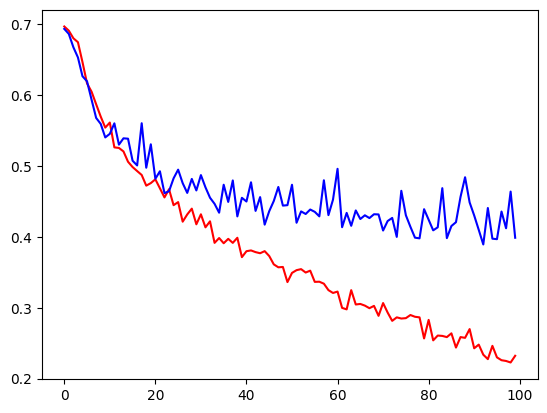

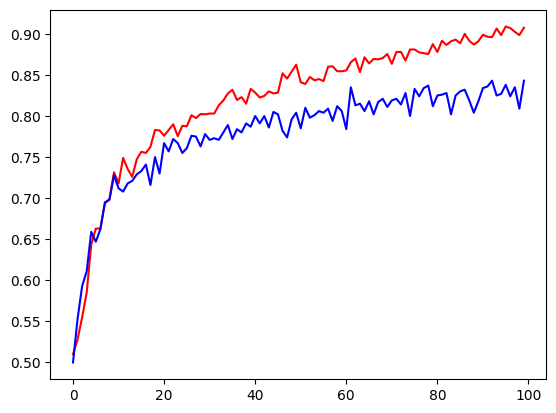

In [11]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

train_acc = history.history['acc']
valid_acc = history.history['val_acc']

plt.plot(train_loss, color='r')
plt.plot(valid_loss, color='b')
plt.show()

plt.plot(train_acc, color='r')
plt.plot(valid_acc, color='b')
plt.show()

In [12]:
# 전이학습(Transfer Learning)
# 기존 Network(기학습된 Network-Pretrained Network)을
# 이용해서 이미지 학습에 필수적인 Feature Extraction부분을 직접 구현하지 않고
# Pretrained Network이 가지고 있는 Feature Extraction부분을 차용해서 사용.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/[AI_SCHOOL_9기]/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/[AI_SCHOOL_9기]/data/cat_dog_small/validation'

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# validation data는 증식을 사용하면 안되요! (평가용 데이터이기 때문)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

# 모델을 생성해 보아요!
# VGG16이라는 pretrained network을 이용할꺼예요!

from tensorflow.keras.applications import VGG16

# VGG16은 이미 만들어진 CNN 모델이예요!
# 이 모델을 만들기 위한 입력데이터셋이 있어요!
# 전세계적으로 유명한 데이터셋들이 있어요.(COCO Dataset, PASCAL VOC Dataset,
#                                          Imagenet Dataset, ...)
# weights 속성은 어떤 데이터셋으로 만들어진 모델인지를 설정하는거예요!
# include_top 속성은 만약 True이면 모델을 가져올때 classifier를 포함해서
# 가져오고 만약  False이면 classifier는 빼고 Feature Extraction부분만 가져와요!

model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))

model_base.summary()

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)  

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]